In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [33]:
DATA_PATH = os.path.join(os.getcwd(),'data','Social_Network_Ads.csv')
df = pd.read_csv(DATA_PATH)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [34]:
df.duplicated().sum()

0

In [35]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [36]:
df.drop(['User ID'],axis=1,inplace=True)

In [37]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
len = LabelEncoder()
df['Gender'] = len.fit_transform(df['Gender'])

In [40]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x = df.drop(['Purchased'],axis=1)
y = df['Purchased']
y.shape

(400,)

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scl = StandardScaler()

x = scl.fit_transform(x)

In [45]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True)
y_train

144    0
318    1
151    0
55     0
337    0
      ..
203    0
17     1
197    0
67     0
260    0
Name: Purchased, Length: 320, dtype: int64

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
clf = LogisticRegression()

clf.fit(X_train,y_train)

y_train_preds = clf.predict(X_train)
y_test_preds = clf.predict(X_test)


In [48]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,ConfusionMatrixDisplay

In [49]:
print(f'train accuracy score : {accuracy_score(y_train,y_train_preds)}')
print(f'test accuracy score : {accuracy_score(y_test,y_test_preds)}')

train accuracy score : 0.86875
test accuracy score : 0.8125


In [50]:
print(f'train precision score : {precision_score(y_train,y_train_preds)}')
print(f'test precision score : {precision_score(y_test,y_test_preds)}')

train precision score : 0.8617021276595744
test precision score : 0.8214285714285714


In [51]:
confusion_matrix(y_train,y_train_preds)

array([[197,  13],
       [ 29,  81]], dtype=int64)

In [52]:
confusion_matrix(y_test,y_test_preds)

array([[42,  5],
       [10, 23]], dtype=int64)

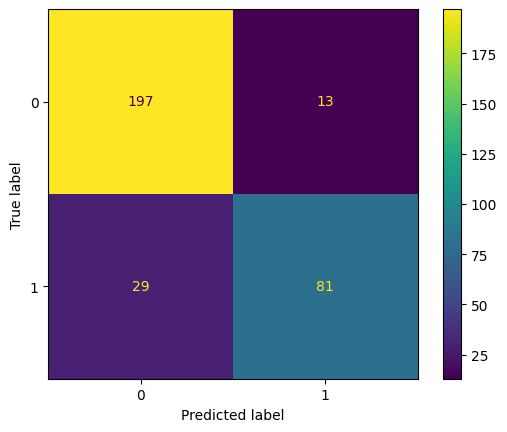

In [53]:
ConfusionMatrixDisplay(confusion_matrix(y_train,y_train_preds)).plot();

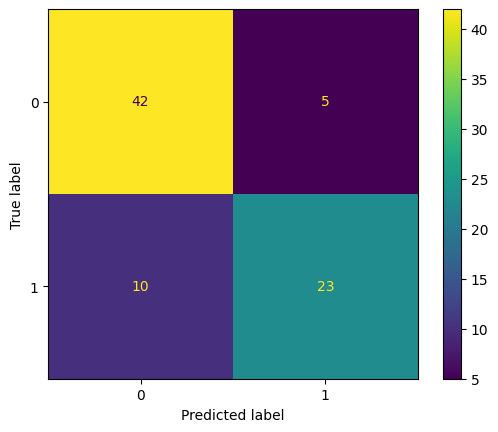

In [54]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_test_preds)).plot();

#### Visulaize Decsion Boundries

In [55]:
import matplotlib.pylab as pl

D:\Data Science\ElectorPI-Initiative\envs\sklearn_spv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


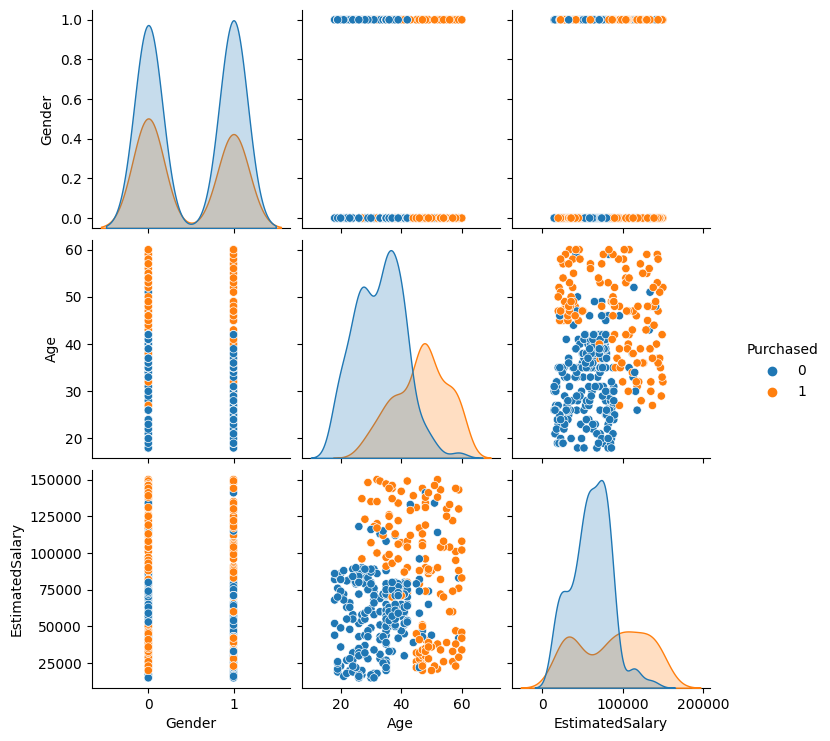

In [56]:
sns.pairplot(df,hue='Purchased')

In [57]:
x

array([[ 1.02020406, -1.78179743, -1.49004624],
       [ 1.02020406, -0.25358736, -1.46068138],
       [-0.98019606, -1.11320552, -0.78528968],
       ...,
       [-0.98019606,  1.17910958, -1.46068138],
       [ 1.02020406, -0.15807423, -1.07893824],
       [-0.98019606,  1.08359645, -0.99084367]])

D:\Data Science\ElectorPI-Initiative\envs\sklearn_spv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Data Science\ElectorPI-Initiative\envs\sklearn_spv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


iteration 1 
train accuracy 0.840625 
test accuracy 0.7625 
iteration 2 
train accuracy 0.884375 
test accuracy 0.8125 


D:\Data Science\ElectorPI-Initiative\envs\sklearn_spv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Data Science\ElectorPI-Initiative\envs\sklearn_spv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


iteration 5 
train accuracy 0.85625 
test accuracy 0.7875 
iteration 10 
train accuracy 0.8625 
test accuracy 0.8125 
iteration 100 
train accuracy 0.8625 
test accuracy 0.8125 
iteration 1000 
train accuracy 0.8625 
test accuracy 0.8125 


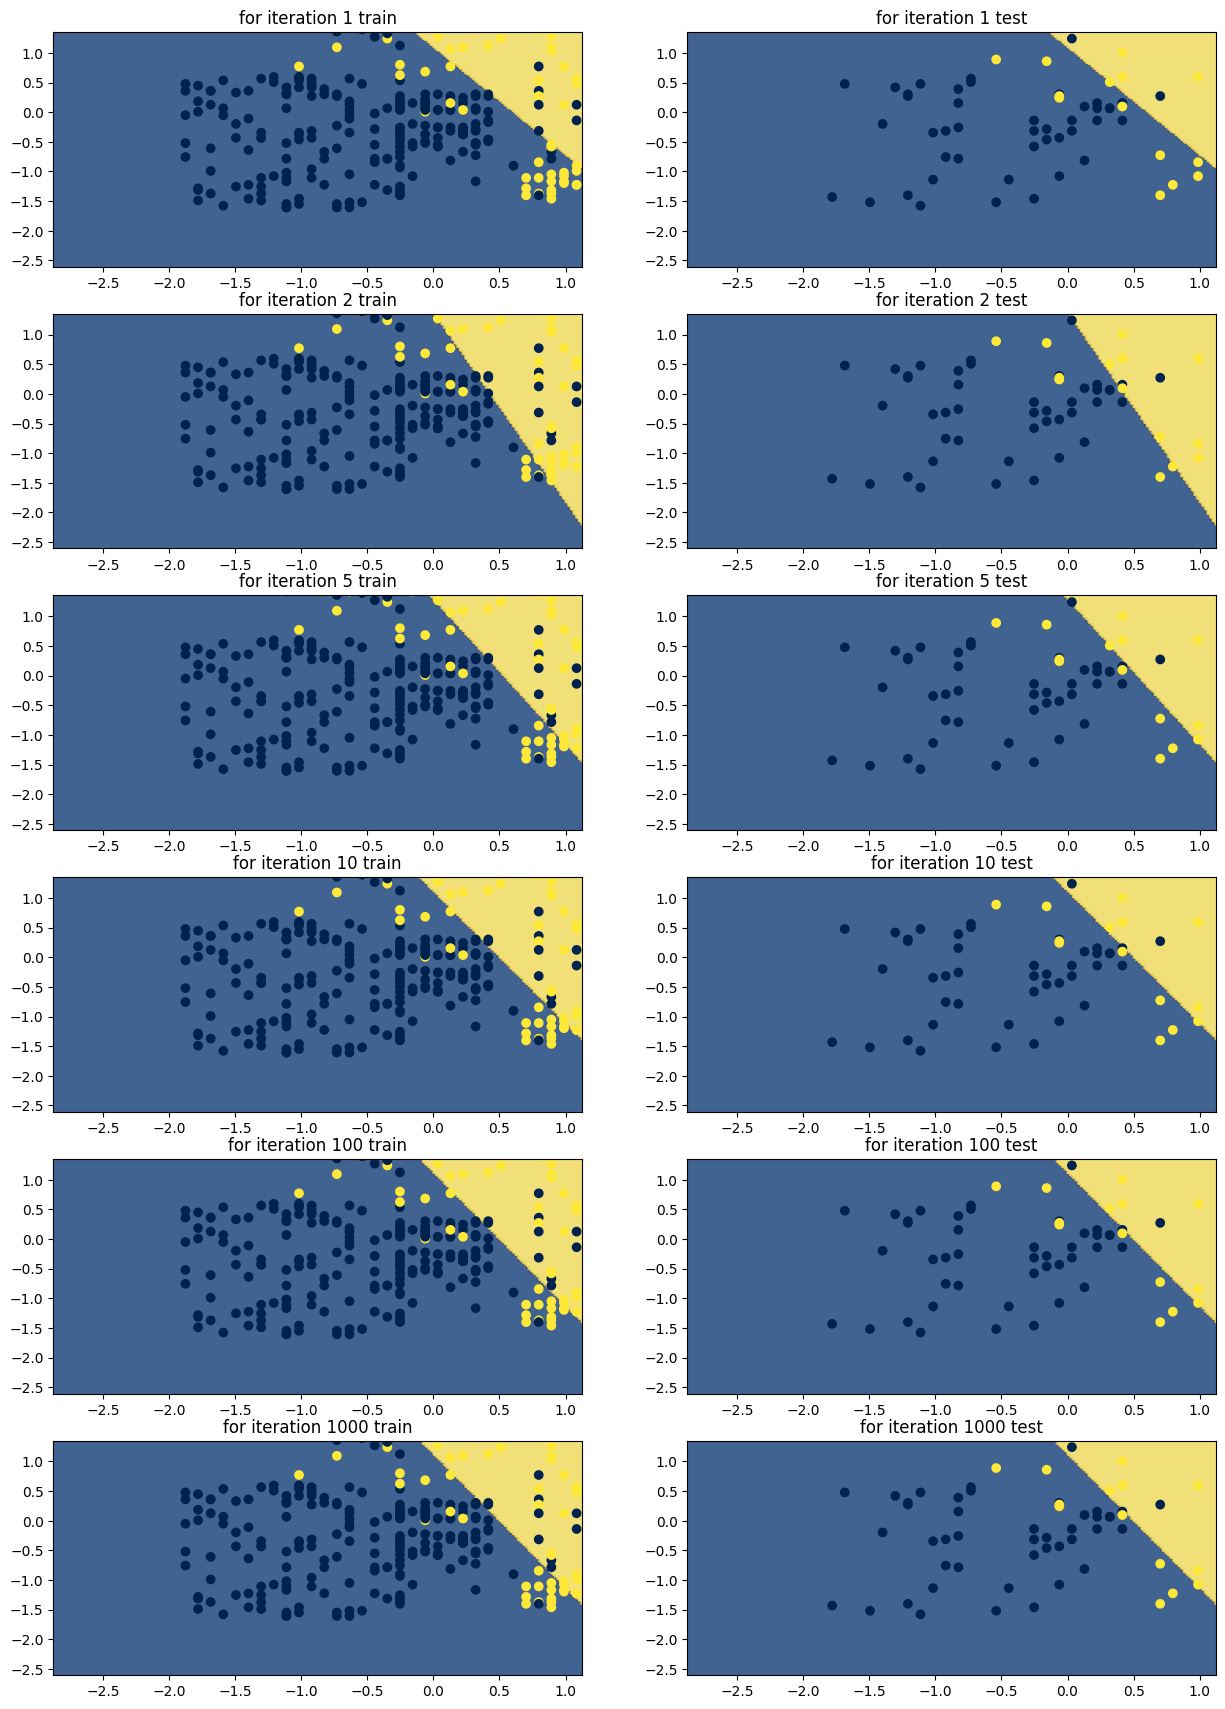

In [58]:
from matplotlib import cm

age_min, age_max = x[:,1].min()-1, x[:,1].max()-1
es_min, es_max = x[:,2].min()-1, x[:,2].max()-1
age_grid, es_grid = np.meshgrid(np.arange(age_min,age_max,0.02),np.arange(es_min,es_max,0.02))

pl.figure(figsize=(15,25))
pl.set_cmap(pl.cm.cividis)

i = 1

for it in [1,2,5,10,100,1000]:
    clf = LogisticRegression(max_iter=it,solver='sag')
    clf.fit(X_train[:,1:],y_train)

    train_preds = clf.predict(X_train[:,1:])
    test_preds = clf.predict(X_test[:,1:])

    print(f'iteration {it} ')
    print(f'train accuracy {accuracy_score(y_train,train_preds)} ')
    print(f'test accuracy {accuracy_score(y_test,test_preds)} ')
   
    pl.subplot(7,2,i)
    
    #z = clf.predict(np.c_[age_grid.ravel(),es_grid.ravel()])  # n.c_[age_grid.ravel(),es_grid.ravel()] = np.array([age_grid.ravel(),es_grid.ravel()]).T
    z = clf.predict(np.array([age_grid.ravel(),es_grid.ravel()]).T)  # n.c_[age_grid.ravel(),es_grid.ravel()] = np.array([age_grid.ravel(),es_grid.ravel()]).T
    z = z.reshape(age_grid.shape)
    
    pl.set_cmap(pl.cm.cividis)
    pl.contourf(age_grid,es_grid,z,alpha=0.75)
    pl.axis('tight')

    pl.scatter(X_train[:,1],X_train[:,2],c=y_train)
    pl.title(f'for iteration {it} train')

    i +=1
    pl.subplot(7,2,i)
    pl.set_cmap(pl.cm.cividis)
    
    pl.contourf(age_grid,es_grid,z,alpha=0.75)
    pl.axis('tight')
    
    pl.scatter(X_test[:,1],X_test[:,2],c=y_test)
    pl.title(f'for iteration {it} test')
    i +=1
    
plt.show()

### SVM

In [59]:
from sklearn.svm import SVC

In [60]:
clf = SVC(kernel='linear')

clf.fit(X_train,y_train)

train_svc_predis = clf.predict(X_train)
test_svc_predis = clf.predict(X_test)

print(f'svc train accuracy {accuracy_score(y_train,train_svc_predis)} ')
print(f'svc test accuracy {accuracy_score(y_test,test_svc_predis)} ')


svc train accuracy 0.859375 
svc test accuracy 0.8 


In [61]:
for k in ['linear', 'poly', 'rbf', 'sigmoid']:
    clf = SVC(kernel=k)
    clf.fit(X_train,y_train)
    
    train_svc_predis = clf.predict(X_train)
    test_svc_predis = clf.predict(X_test)
    
    print(f'svc train accuracy for kernel {k}  is{accuracy_score(y_train,train_svc_predis)} ')
    print(f'svc test accuracy for kernel {k}  is {accuracy_score(y_test,test_svc_predis)} ')
    print('-'*50)

svc train accuracy for kernel linear  is0.859375 
svc test accuracy for kernel linear  is 0.8 
--------------------------------------------------
svc train accuracy for kernel poly  is0.9 
svc test accuracy for kernel poly  is 0.8125 
--------------------------------------------------
svc train accuracy for kernel rbf  is0.921875 
svc test accuracy for kernel rbf  is 0.8625 
--------------------------------------------------
svc train accuracy for kernel sigmoid  is0.790625 
svc test accuracy for kernel sigmoid  is 0.75 
--------------------------------------------------


In [62]:
for d in range(1,20):
    clf = SVC(kernel='poly',degree=d)
    clf.fit(X_train,y_train)
    
    train_svc_predis = clf.predict(X_train)
    test_svc_predis = clf.predict(X_test)
    
    print(f'svc train accuracy for degree {d}  is{accuracy_score(y_train,train_svc_predis)} ')
    print(f'svc test accuracy for degree {d}  is {accuracy_score(y_test,test_svc_predis)} ')
    print('-'*50)

svc train accuracy for degree 1  is0.853125 
svc test accuracy for degree 1  is 0.7625 
--------------------------------------------------
svc train accuracy for degree 2  is0.809375 
svc test accuracy for degree 2  is 0.725 
--------------------------------------------------
svc train accuracy for degree 3  is0.9 
svc test accuracy for degree 3  is 0.8125 
--------------------------------------------------
svc train accuracy for degree 4  is0.828125 
svc test accuracy for degree 4  is 0.7625 
--------------------------------------------------
svc train accuracy for degree 5  is0.890625 
svc test accuracy for degree 5  is 0.825 
--------------------------------------------------
svc train accuracy for degree 6  is0.83125 
svc test accuracy for degree 6  is 0.7625 
--------------------------------------------------
svc train accuracy for degree 7  is0.890625 
svc test accuracy for degree 7  is 0.7875 
--------------------------------------------------
svc train accuracy for degree 8  is

iteration 1000 
train accuracy 0.846875 
test accuracy 0.8 
iteration 1000 
train accuracy 0.821875 
test accuracy 0.725 
iteration 1000 
train accuracy 0.88125 
test accuracy 0.7875 
iteration 1000 
train accuracy 0.83125 
test accuracy 0.75 
iteration 1000 
train accuracy 0.85 
test accuracy 0.8 
iteration 1000 
train accuracy 0.8375 
test accuracy 0.775 
iteration 1000 
train accuracy 0.84375 
test accuracy 0.7875 
iteration 1000 
train accuracy 0.821875 
test accuracy 0.7625 
iteration 1000 
train accuracy 0.84375 
test accuracy 0.775 


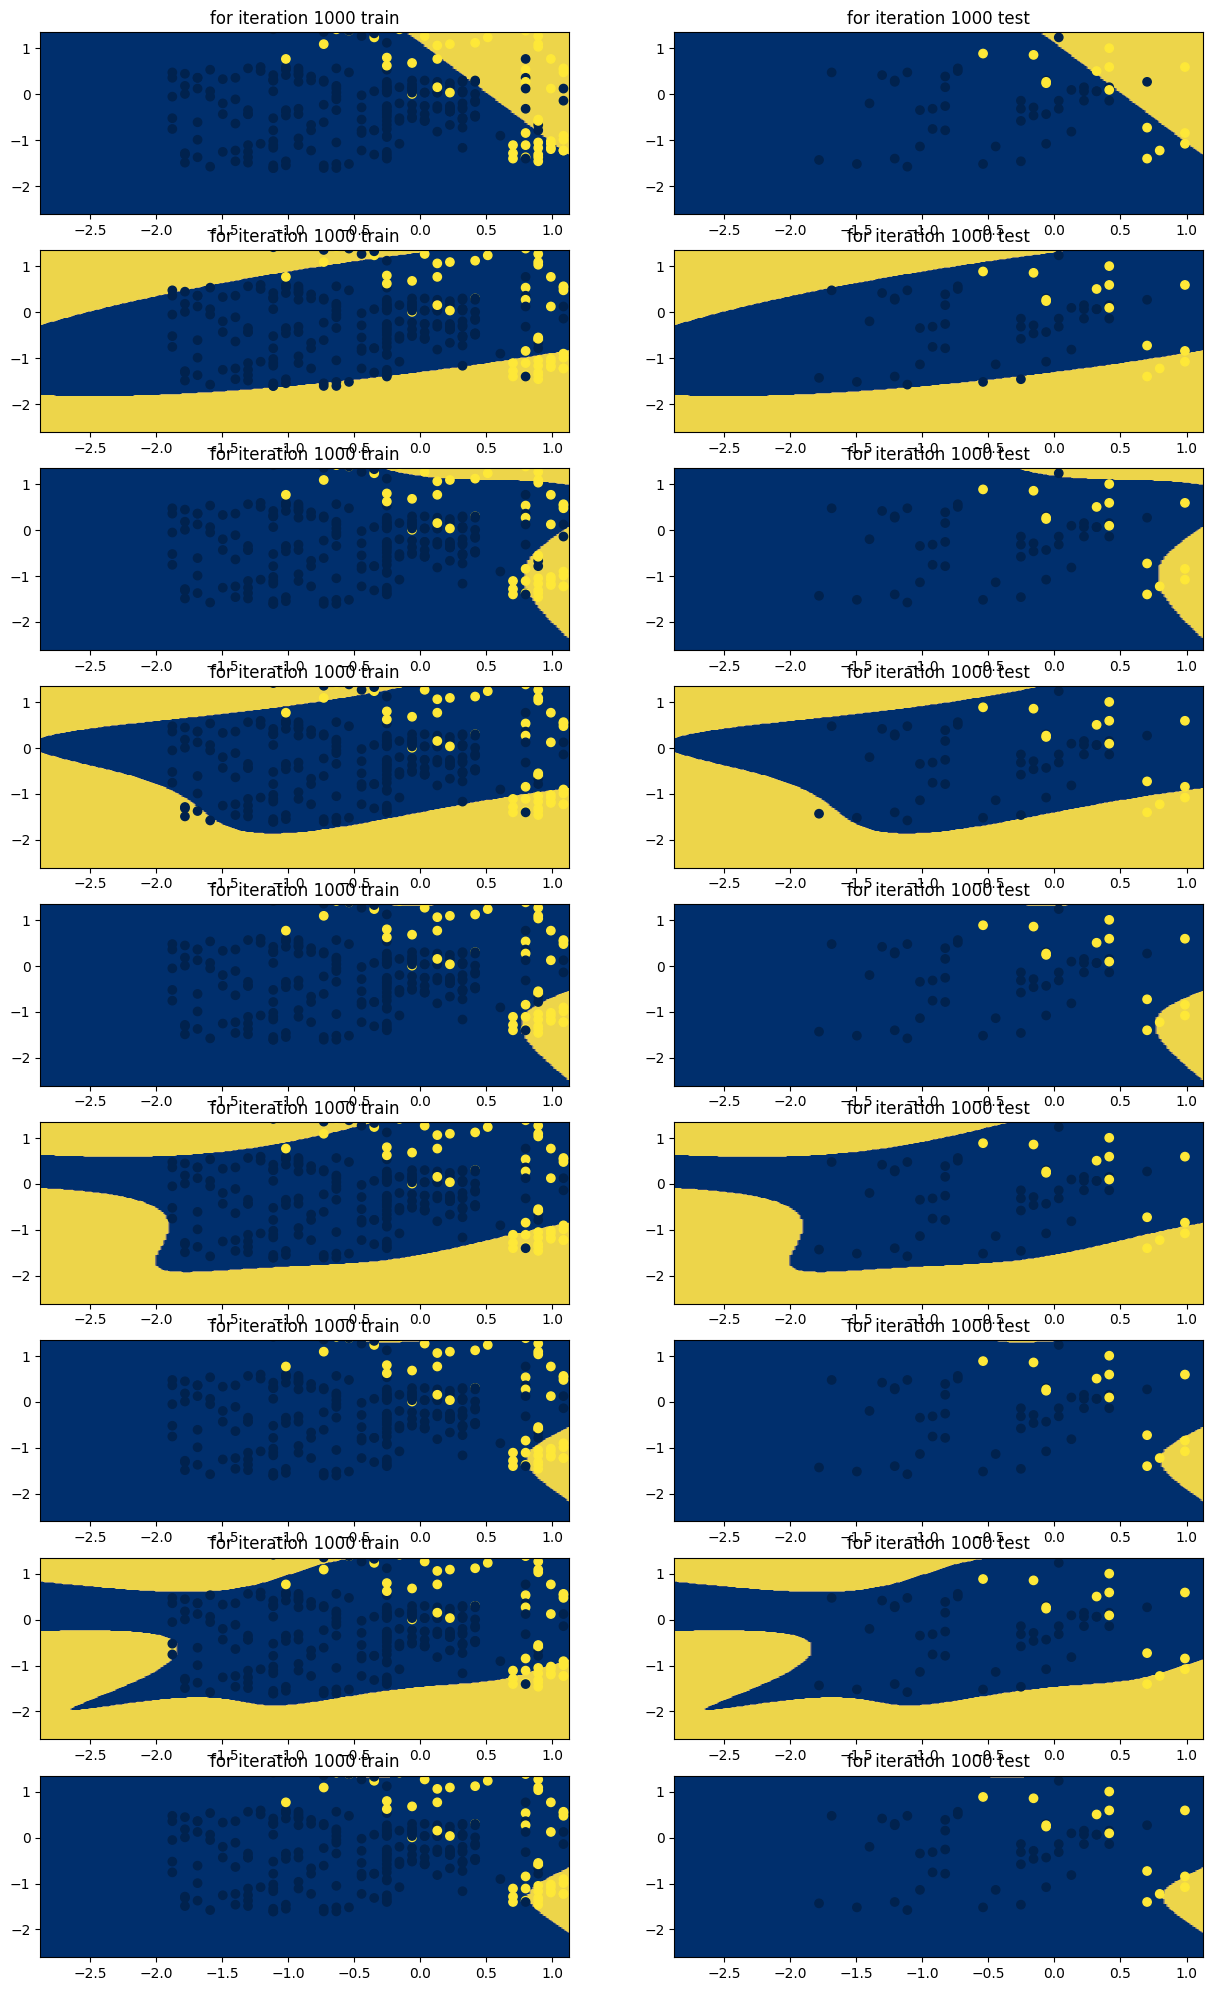

In [63]:
from matplotlib import cm

age_min, age_max = x[:,1].min()-1, x[:,1].max()-1
es_min, es_max = x[:,2].min()-1, x[:,2].max()-1
age_grid, es_grid = np.meshgrid(np.arange(age_min,age_max,0.02),np.arange(es_min,es_max,0.02))

pl.figure(figsize=(15,25))
pl.set_cmap(pl.cm.cividis)

i = 1

for d in range(1,10):
    clf = SVC(kernel='poly',degree=d)
    clf.fit(X_train[:,1:],y_train)

    train_preds = clf.predict(X_train[:,1:])
    test_preds = clf.predict(X_test[:,1:])

    print(f'iteration {it} ')
    print(f'train accuracy {accuracy_score(y_train,train_preds)} ')
    print(f'test accuracy {accuracy_score(y_test,test_preds)} ')
   
    pl.subplot(9,2,i)
    
    #z = clf.predict(np.c_[age_grid.ravel(),es_grid.ravel()])  # n.c_[age_grid.ravel(),es_grid.ravel()] = np.array([age_grid.ravel(),es_grid.ravel()]).T
    z = clf.predict(np.array([age_grid.ravel(),es_grid.ravel()]).T)  # n.c_[age_grid.ravel(),es_grid.ravel()] = np.array([age_grid.ravel(),es_grid.ravel()]).T
    z = z.reshape(age_grid.shape)
    
    pl.set_cmap(pl.cm.cividis)
    pl.contourf(age_grid,es_grid,z)
    pl.axis('tight')

    pl.scatter(X_train[:,1],X_train[:,2],c=y_train)
    pl.title(f'for iteration {it} train')

    i +=1
    pl.subplot(9,2,i)
    pl.set_cmap(pl.cm.cividis)
    
    pl.contourf(age_grid,es_grid,z)
    pl.axis('tight')
    
    pl.scatter(X_test[:,1],X_test[:,2],c=y_test)
    pl.title(f'for iteration {it} test')
    i +=1
    
plt.show()